# ML Zoomcamp 2023 &ndash; Midterm Project

This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. The data set can be retrieved from the UCI Machine Learning Repository at the link [Heart failure clinical records](http://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records). The research article for the data set can be accessed at the link [Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone](https://www.semanticscholar.org/paper/Machine-learning-can-predict-survival-of-patients-Chicco-Jurman/e64579d8593140396b518682bb3a47ba246684eb) (link to pdf of article [here](https://bmcmedinformdecismak.biomedcentral.com/counter/pdf/10.1186/s12911-020-1023-5.pdf)).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.rename(columns={'DEATH_EVENT': 'death_event'}, inplace=True)
for col in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'death_event']:
    df[col].replace(to_replace=[0, 1], value=['No', 'Yes'], inplace=True)
df.sex.replace(to_replace=[0, 1], value=['Female', 'Male'], inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [4]:
numerical_columns = list(df.select_dtypes('number').columns)
numerical_columns

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [5]:
categorical_columns = list(df.select_dtypes('object').columns)
categorical_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

### Exploratory data analysis

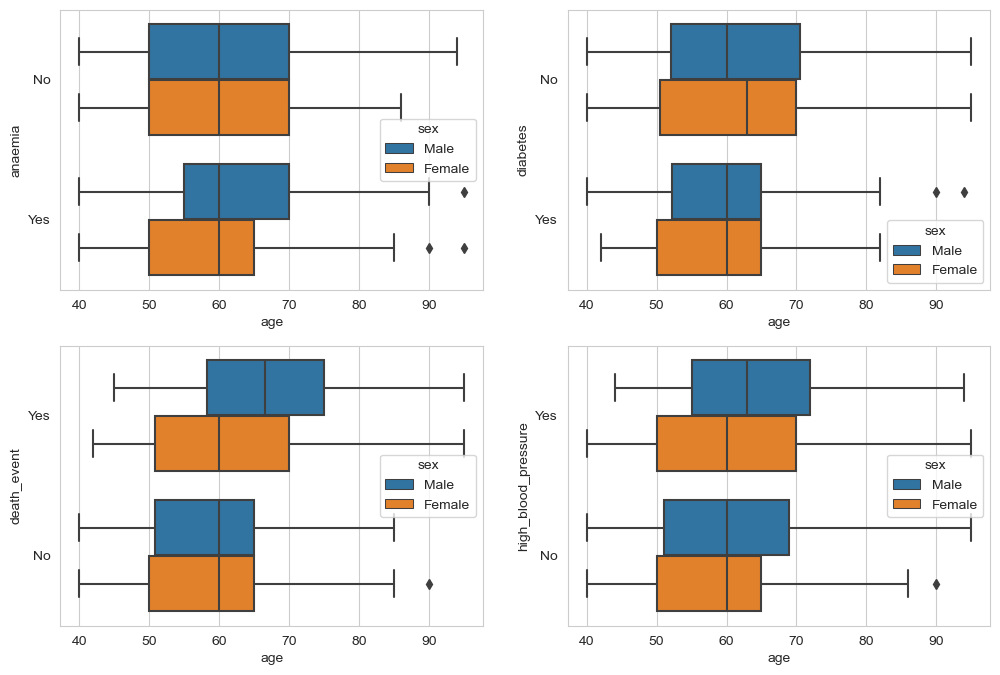

In [6]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x='age', y='anaemia', hue='sex', data=df, ax=ax[0, 0])
    sns.boxplot(x='age', y='diabetes', hue='sex', data=df, ax=ax[0, 1])
    sns.boxplot(x='age', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    ax[1, 0].legend(loc='center right', title='sex')
    sns.boxplot(x='age', y='high_blood_pressure', hue='sex', data=df, ax=ax[1, 1])

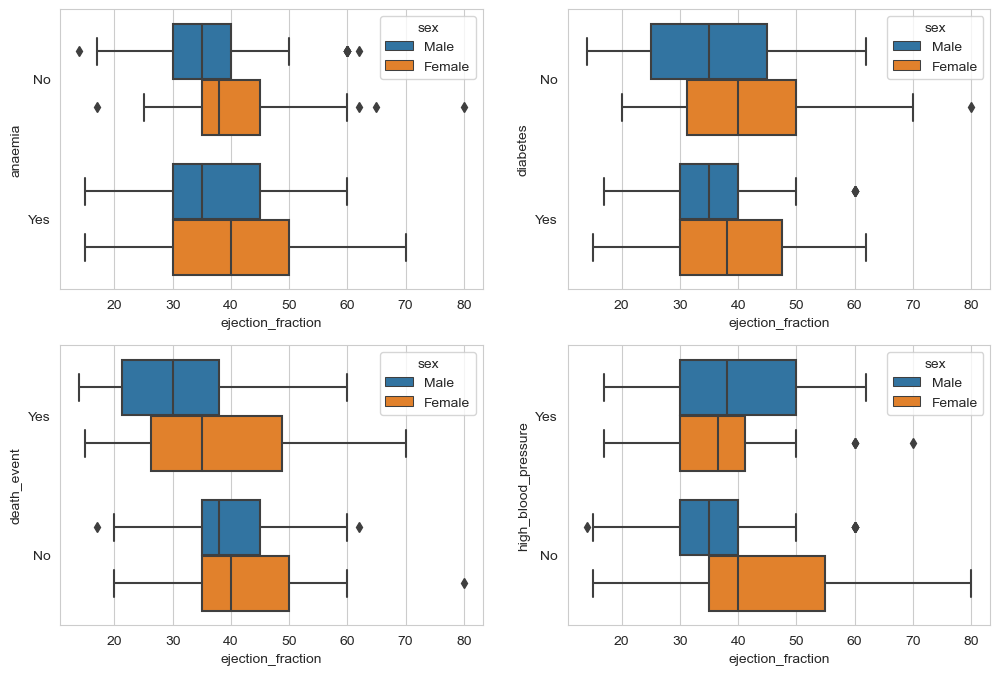

In [7]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x='ejection_fraction', y='anaemia', hue='sex', data=df, ax=ax[0, 0])
    sns.boxplot(x='ejection_fraction', y='diabetes', hue='sex', data=df, ax=ax[0, 1])
    sns.boxplot(x='ejection_fraction', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    sns.boxplot(x='ejection_fraction', y='high_blood_pressure', hue='sex', data=df, ax=ax[1, 1])

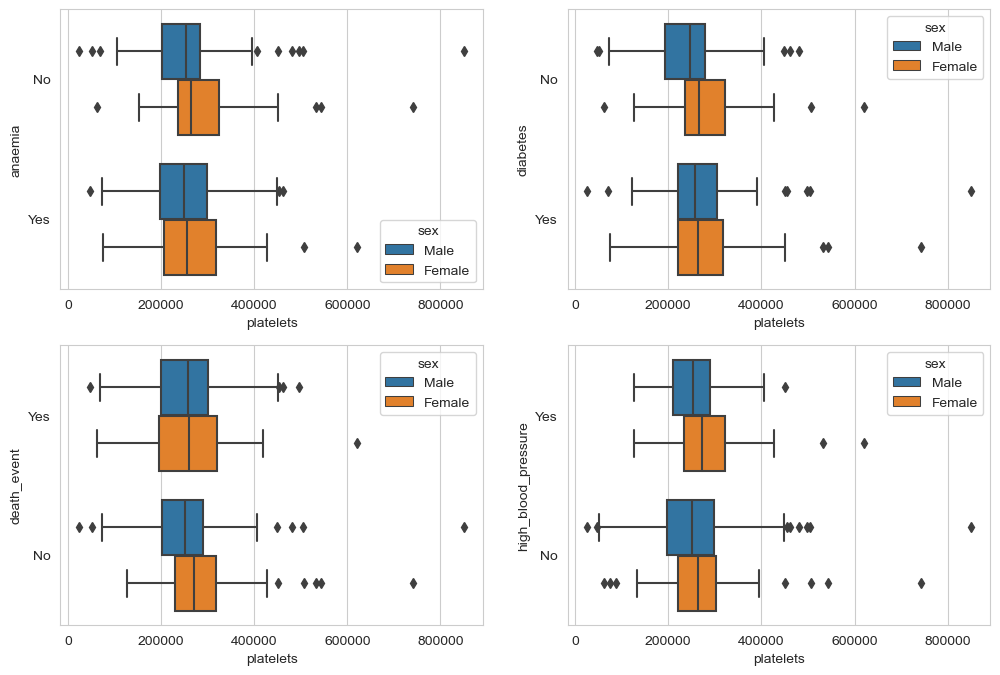

In [8]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x='platelets', y='anaemia', hue='sex', data=df, ax=ax[0, 0])
    sns.boxplot(x='platelets', y='diabetes', hue='sex', data=df, ax=ax[0, 1])
    sns.boxplot(x='platelets', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    sns.boxplot(x='platelets', y='high_blood_pressure', hue='sex', data=df, ax=ax[1, 1])

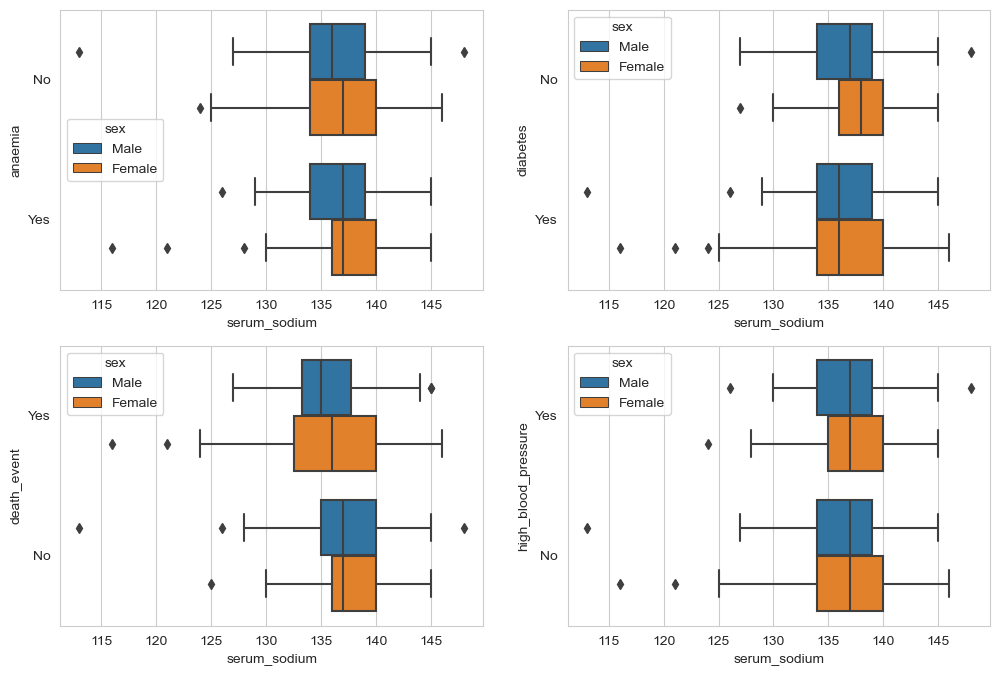

In [9]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x='serum_sodium', y='anaemia', hue='sex', data=df, ax=ax[0, 0])
    sns.boxplot(x='serum_sodium', y='diabetes', hue='sex', data=df, ax=ax[0, 1])
    sns.boxplot(x='serum_sodium', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    sns.boxplot(x='serum_sodium', y='high_blood_pressure', hue='sex', data=df, ax=ax[1, 1])

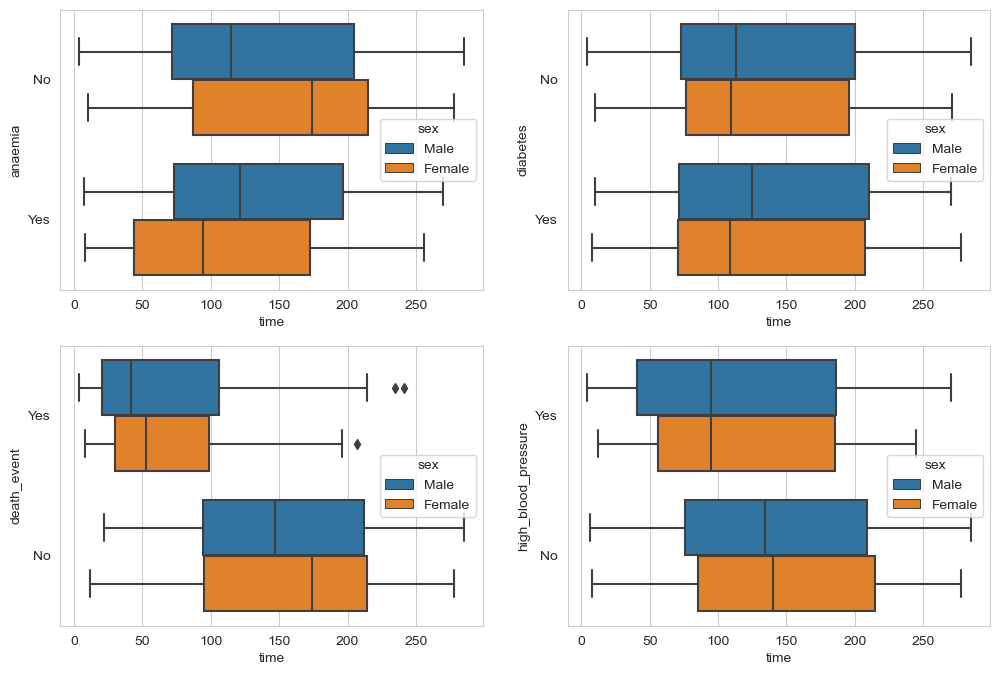

In [10]:
sns.set_style('whitegrid')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    sns.boxplot(x='time', y='anaemia', hue='sex', data=df, ax=ax[0, 0])
    ax[0, 0].legend(loc='center right', title='sex')
    sns.boxplot(x='time', y='diabetes', hue='sex', data=df, ax=ax[0, 1])
    ax[0, 1].legend(loc='center right', title='sex')
    sns.boxplot(x='time', y='death_event', hue='sex', data=df, ax=ax[1, 0])
    ax[1, 0].legend(loc='center right', title='sex')
    sns.boxplot(x='time', y='high_blood_pressure', hue='sex', data=df, ax=ax[1, 1])
    ax[1, 1].legend(loc='center right', title='sex')

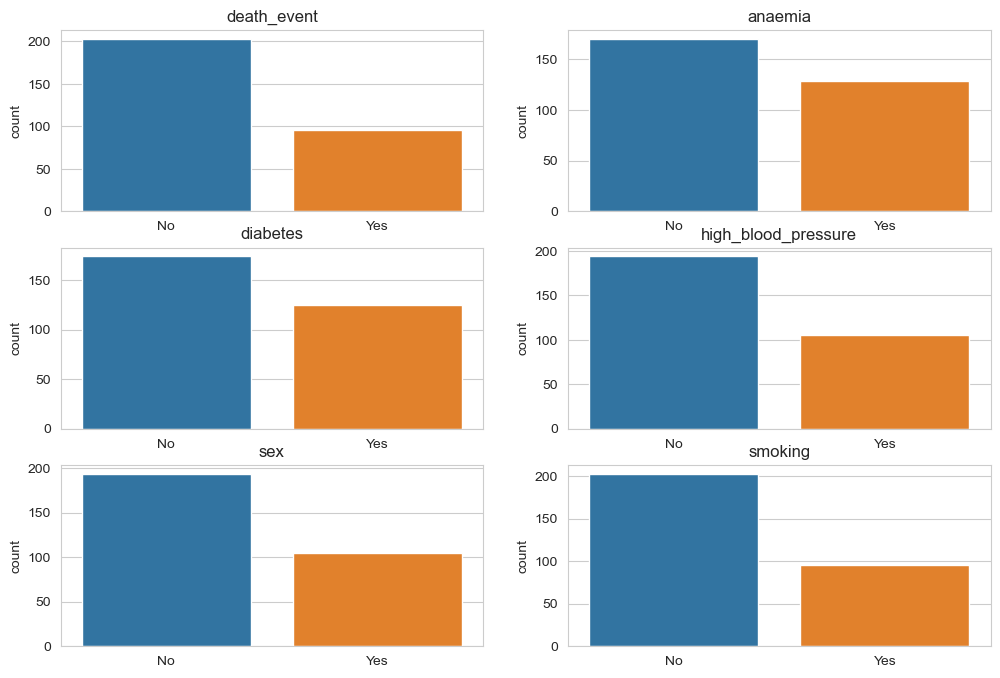

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, ax = plt.subplots(3, 2, figsize=(12, 8))    
    death_events = df.death_event.value_counts().values
    de_df = df.death_event.value_counts()
    sns.barplot(x=['No', 'Yes'], y=de_df, ax=ax[0, 0])
    ax[0, 0].set_title('death_event')
    an_df = df.anaemia.value_counts()
    sns.barplot(x=['No', 'Yes'], y=an_df, ax=ax[0, 1])
    ax[0, 1].set_title('anaemia')
    db_df = df.diabetes.value_counts()
    sns.barplot(x=['No', 'Yes'], y=db_df, ax=ax[1, 0])
    ax[1, 0].set_title('diabetes')
    hbp_df = df.high_blood_pressure.value_counts()
    sns.barplot(x=['No', 'Yes'], y=hbp_df, ax=ax[1, 1])
    ax[1, 1].set_title('high_blood_pressure')
    sex_df = df.sex.value_counts()
    sns.barplot(x=['No', 'Yes'], y=sex_df, ax=ax[2, 0])
    ax[2, 0].set_title('sex')
    smk_df = df.smoking.value_counts()
    sns.barplot(x=['No', 'Yes'], y=smk_df, ax=ax[2, 1])
    ax[2, 1].set_title('smoking')